# Acceleration

Acceleration methods are powerful tools designed to enhance the convergence rate of numerical algorithms. These methods find applications in a wide range of problems, including solving nonlinear equations, numerical integration, numerical differentiation, and accelerating the convergence of infinite series. Broadly, acceleration methods can be classified into iterative algorithms, recursive algorithms, and series acceleration techniques.

Each method has its unique advantages and limitations in different problem scenarios. Generally, acceleration algorithms perform best when applied to convergent sequences, but their effectiveness may vary depending on the sequence's properties. In practical applications, it is crucial to select the appropriate acceleration technique based on the problem and the sequence's properties.

Furthermore, it is essential to consider the trade-offs between computational efficiency and accuracy for the chosen method. Staying current with the latest research and findings in the field is important, as it enables researchers and practitioners to apply the most effective acceleration methods to their specific problems, leading to more efficient and accurate numerical solutions.

## Iterative Algorithms

In nature, Iterative algorithms are iterative and require an initial guess to start with. They update the guess in each iteration until convergence is achieved. Generally applicable for solving nonlinear equations, but they need a suitable initial value to ensure convergence. They may not be as effective as other methods in certain scenarios.

### Newton-Raphson Method  

This root-finding algorithm uses derivative information to iteratively improve an initial guess of the root. It is commonly employed for solving nonlinear equations. Highly efficient when the derivative is easy to compute and a good initial estimate is available. However, it may have slow convergence or not converge at all if these conditions are not met.

### Secant method  

This root-finding algorithm approximates the derivative using a finite difference formula. Similar to the Newton-Raphson method, it does not require the evaluation of derivatives and is often used for solving nonlinear equations. Its convergence rate is usually slower than the Newton-Raphson method but provides better efficiency when the derivative is not easily computable.

## Recursive Algorithms

In nature, Recursive algorithms are recursive and construct higher-precision approximations from a finite number of approximations with limited precision. They usually provide high accuracy in scenarios like numerical integration and differentiation. Although they require a relatively larger amount of computation, they can generally be accelerated through parallel computation.

### Richardson Extrapolation

Richardson Extrapolation is a sequence acceleration technique developed by Lewis Fry Richardson. It aims to improve the convergence rate of a sequence or series of estimates of a particular value $\lim\limits_{n→0} A(n)$. This method is widely employed in numerical analysis, specifically in numerical integration, differentiation, and other applications that require accurate approximations.

The core idea behind Richardson Extrapolation is using lower-order approximations to compute a higher-order, more accurate approximation. This recursive algorithm involves combining approximations of various orders to achieve a better estimate of the desired value. Although the method may require a relatively larger amount of computation, it can be accelerated through parallel computing or by exploiting the structure of the problem at hand.

We introduce a convergent sequence $\{a_n\}_{n \in\mathbb{N}}$, the sum of the first $i$ terms can be described as $ A_i = \sum\limits_{n=0}^{i}a_n $, and forms a series $\{A_i\}_{i \in\mathbb{N}}$.

This extrapolation process begins with a sequence of approximations $A(n)$ that converges to the desired value $A^*$ as $n$ approaches zero. By using the relationships between the lower-order approximations, we can compute more accurate higher-order approximations.

For the original sequence A(n), the first-order Richardson Extrapolation sequence is given by:

$$ R_{(1)}(n) = \frac{(n+1)A(n+1) - nA(n)}{1!} $$

For the second order, we apply the first-order Richardson extrapolation on R_1(n):

$$ R_{(2)}(n) = \frac{(n+2)^2A(n+2) - 2(n+1)^2A(n+1) + n^2A(n)}{2!} $$

For the third order, we apply the second-order Richardson extrapolation on R_2(n):

$$ R_{(3)}(n) = \frac{(n+3)^3 A(n+3) - 3(n+2)^3 A(n+2) + 3(n+1)^3 A(n+1) - n^3 A(n)}{3!} $$

To extend Richardson extrapolation to higher orders, we can compute additional approximations and use their relationships recursively. This process allows us to obtain increasingly accurate estimates of the desired value $A^*$ as we advance through the extrapolation process. For the general higher-order Richardson extrapolation, the formula is:

$$ R_{(i)}(n) = \frac{1}{i!} \sum\limits_{k=0}^{i} (-1)^{i-k}{\mathrm C}_n^k(n+k)^i A(n+k) $$

where ${\mathrm C}_n^k$ is the combination of selecting $k$ elements from $n$, which can be calculated as:

$$ {\mathrm C}_n^k = \frac{n!}{k!(n-k)!} $$

Each level of the Richardson extrapolation is relatively independent. The method calculates higher-order and more accurate approximations by using lower-order approximations. In this process, each level of transformation attempts to eliminate error terms of different orders. Therefore, each level of transformation is relatively independent and does not directly depend on the result of the previous level of transformation.

In summary, Richardson extrapolation is a potent technique for enhancing the accuracy of numerical approximations by targeting convergent sequences. This approach allows Richardson extrapolation to achieve a faster convergence rate when dealing with such sequences. However, its performance may be limited when applied to non-convergent sequences or those with an extremely slow convergence rate.


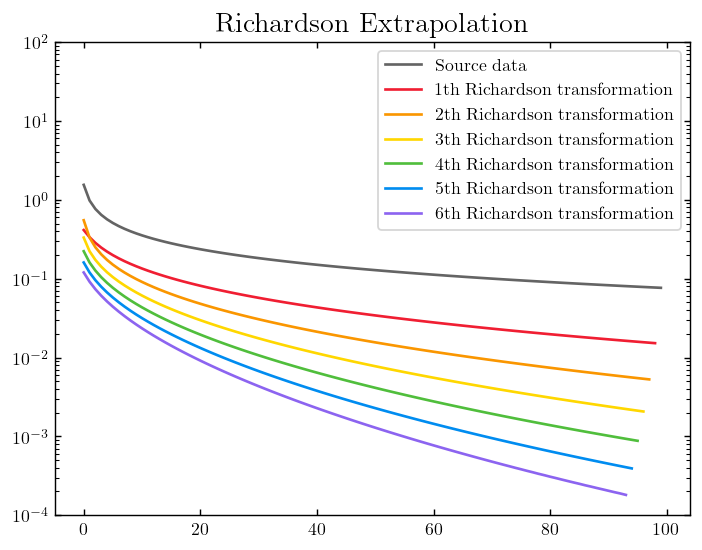

In [1]:
# Richardson Extrapolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def richardson_extrapolation(Y, order):
    n = len(Y)
    R = np.zeros_like(Y)
    
    if order == 1:
        R[:-1] = ((np.arange(1, n) + 1) * Y[1:] - np.arange(1, n) * Y[:-1]) / np.math.factorial(1)
    else:
        coeff = np.array([(-1) ** (order - k) * comb(order, k) for k in range(order + 1)])
        arange = np.arange(n - order)
        mesh_arange, mesh_k = np.meshgrid(arange, np.arange(order + 1), indexing='ij')
        temp = (mesh_arange + mesh_k) ** order * Y[mesh_arange + mesh_k] * coeff[mesh_k]
        R[:n - order] = np.sum(temp, axis=-1) / np.math.factorial(order)
            
    return R


# Generate a new dataset using the function f(x) = sum_n 1/(n^2+x) for n in [1, 10] which converges to 0 as x approaches infinity
X_demo = np.arange(0, 100)
Y_demo = np.array([np.sum([1/(n ** 2 + x) for n in range(1, 11)]) for x in X_demo])

def plot_richardson_extrapolation(X, Y, order):
    plt.figure(dpi=128)
    params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

    plt.title("Richardson Extrapolation")
    plt.plot(X, Y, c="#646464", label="Source data")

    colors = ["#F01E32", "#FA9600", "#FFD700", "#50BE3C", "#008CF0", "#8C64F0"]
    
    for k in range(1, order+1):
        U = richardson_extrapolation(Y_demo, k)
        plt.plot(X_demo[:-k], U[:-k], c=colors[k-1], label=f"{k}th Richardson transformation")
    
    plt.yscale('log')
    plt.ylim([1e-4, 1e2])
    plt.legend(loc="best")
    plt.show()

# Call the function with the desired order and pass X_demo and Y_demo as arguments
plot_richardson_extrapolation(X_demo, Y_demo, order=6)


### Aitken Extrapolation

Aitken Extrapolation, named after Alexander Aitken, is a sequence transformation technique used to accelerate the convergence rate of a series of approximations. It was introduced by Alexander Aitken in 1926 and is named after him. Its early form was known to Seki Kōwa (end of the 17th century) and was used for the rectification of the circle, i.e., the calculation of $\mathrm \pi$. It is particularly effective for linearly convergent sequences and has applications in various fields of numerical analysis, such as solving equations and approximating integrals or derivatives.

The central concept of Aitken Extrapolation is to eliminate the leading error term in a sequence, allowing the sequence to converge faster to its limit. This method relies on the idea of iteratively applying a transformation to the given sequence to produce a new, more rapidly converging sequence.

Given a sequence of approximations $A(n)$, which converges linearly to the desired value $A^*$, we can define a new sequence, $P(n)$, by applying the Aitken transformation:

$$ P_{(1)}(n) = A(n) - \frac{(\Delta A(n))^2}{\Delta^2 A(n)} = A(n) - \frac{(A(n+1) - A(n))^2}{A(n+2) - 2A(n+1) + A(n)} $$

where:

$$\begin{align}\Delta A(n) &= A(n+1) - A(n) \\
\Delta^2 A(n) &= \Delta A(n+1) - \Delta A(n) 
\end{align}$$

The new sequence $P(n)$ converges more rapidly to the desired value $A^*$ compared to the original sequence $A(n)$. The transformation can be applied multiple times to further accelerate convergence, producing a sequence of sequences $P_{(2)}(n), P_{(3)}(n), \cdots.$.

For higher-order acceleration, the general formula is given by:

$$ P_{(i)}(n) =P_{(i-1)}(n) - \frac{(\Delta P_{(i-1)}(n))^2}{\Delta^2P_{(i-1)}(n)}= P_{(i-1)}(n) - \frac{(P_{(i-1)}(n+1) - P_{(i-1)} (n))^2}{P_{(i-1)}(n+2) - 2P_{(i-1)}(n+1) + P_{(i-1)}(n)} $$

It can be noticed that Aitken extrapolation is based on the result of the previous transformation at each level. Specifically, Aitken extrapolation accelerates convergence by eliminating the dominant error term between adjacent terms. In summary, Aitken Extrapolation can significantly enhance the convergence rate of a sequence when it is applied to linearly convergent sequences. However, it may not be as effective when dealing with sequences that exhibit slow or non-convergent behavior. 


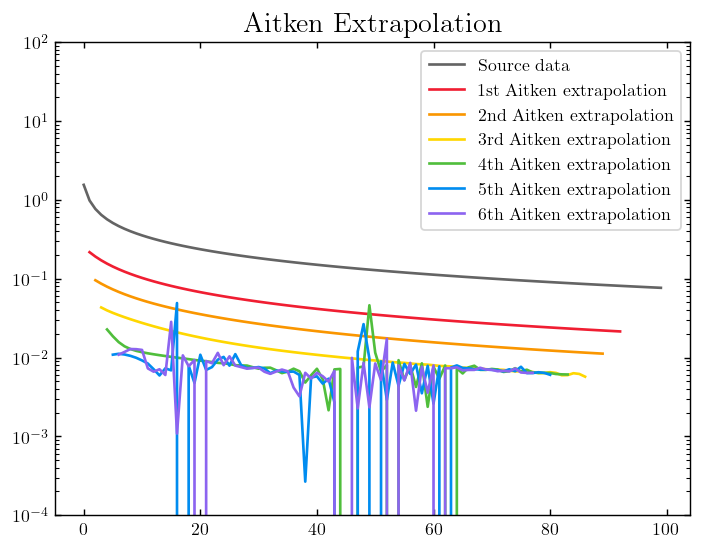

In [2]:
# Aitken extrapolation

import numpy as np
import matplotlib.pyplot as plt

def aitken_extrapolation_vectorized(data):
    shifted_left = np.pad(data[:-2], (2, 0), mode='constant')
    shifted_mid = np.pad(data[1:-1], (1, 1), mode='constant')
    shifted_right = np.pad(data[2:], (0, 2), mode='constant')

    numerator = (shifted_mid - shifted_left) ** 2
    denominator = shifted_right - 2 * shifted_mid + shifted_left

    transformed_data = np.where((np.arange(len(data)) > 1) & (np.arange(len(data)) < len(data) - 1), shifted_left - numerator / denominator, 0)
    
    return transformed_data[2:-2]

def apply_aitken_extrapolations(data, num_iterations):
    return [data := aitken_extrapolation_vectorized(data) for _ in range(num_iterations + 1)]

# Generate a new dataset using the function f(x) = sum_n 1/(n^2+x) for n in [1, 10] which converges to 0 as x approaches infinity
X_demo = np.arange(0, 100)
Y_demo = np.array([np.sum([1 / (n ** 2 + x) for n in range(1, 11)]) for x in X_demo])

# Apply Aitken Extrapolations
num_iterations = 6
transformed_data_list_demo = apply_aitken_extrapolations(Y_demo, num_iterations)

# Set up the specified style parameters
plt.figure(dpi=128)
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

# Plot the data and Aitken extrapolations
plt.title("Aitken Extrapolation")
plt.plot(X_demo, Y_demo, c="#646464", label="Source data")

colors = ["#F01E32", "#FA9600", "#FFD700", "#50BE3C", "#008CF0", "#8C64F0"]
labels = ["1st Aitken extrapolation", "2nd Aitken extrapolation", "3rd Aitken extrapolation", "4th Aitken extrapolation", "5th Aitken extrapolation", "6th Aitken extrapolation"]

for i in range(1, num_iterations + 1):
    transformed_data = transformed_data_list_demo[i]
    plt.plot(X_demo[i:len(transformed_data)+i], transformed_data, c=colors[i-1], label=labels[i-1])

plt.yscale('log'); plt.ylim([1e-4, 1e2])
plt.ylim([1e-4, 1e2])
plt.legend(loc="best")
plt.show()



## Series Acceleration Methods

Series acceleration methods transform a given infinite series into another one with faster convergence by manipulating its terms in various ways. They are advantageous in accelerating the convergence of infinite series but may not be the best choice for other problems, such as solving nonlinear equations.

### Shanks Transformation

Shanks Transformation, also known as the Epsilon algorithm, is a non-linear series acceleration method designed to increase the convergence rate of a sequence. Developed by Daniel Shanks in the 1950s, this method focuses on creating a new sequence from the original one that converges more rapidly to the same limit. 

The transformed sequence is constructed by considering the differences between consecutive terms of the original sequence and applying a specific formula. This process can be applied iteratively to further improve the convergence rate. Shanks Transformation is commonly used for the summation of infinite series but may not be the best choice for series that already exhibit a fast convergence rate.

Given a convergent sequence $\{a_n\}_{n \in\mathbb{N}}$, the sum of the first $i$ terms can be described as $ A_i = \sum\limits_{n=0}^{i}a_n $, forming a new sequence $\{A_i\}_{i \in\mathbb{N}}$. Assuming the series converges, $A_i$ will also converge to $S$ as $n→∞$. The Shanks transformation $L(A_i)$ is defined by:

$$\begin{aligned}
L(A_i) &= A_{i+1} - \frac{(A_{i+1}-A_i)^2}{(A_{i+1}-A_i)-(A_i-A_{i-1})}; \\ 
&= \frac{A_{i+1}A_{i-1}-A_i^2}{A_{i+1}-2A_i+A_{i-1}}\end{aligned}$$

Shanks Transformation relies on the result of the previous transformation at each level, accelerating convergence by eliminating the dominant error term between adjacent terms. Each level of transformation depends on the result of the previous level of transformation.

Higher-order Shanks transformations can be obtained by applying the Shanks transformation iteratively on the transformed sequence. For example, the second-order Shanks transformation $L^2(A_i)$ can be obtained by applying the Shanks transformation on the first-order transformed sequence $L(A_i)$, and the third-order Shanks transformation $L^3(A_i)$ can be obtained by applying the Shanks transformation on the second-order transformed sequence $L^2(A_i)$, and so on.

For the $k$-th order Shanks transformation, the general formula is:

$$ L^{(k)}(A_i) = L^{(1)}(L^{(k-1)}(A_i)) $$

Shanks Transformation performs well on sequences that exhibit orthogonal convergence, where the difference between adjacent terms in the sequence tends towards zero. For such sequences, this transformation can improve the convergence rate and increase the accuracy of numerical approximations. However, Shanks Transformation may not perform well for non-convergent sequences or sequences with a very slow convergence rate.


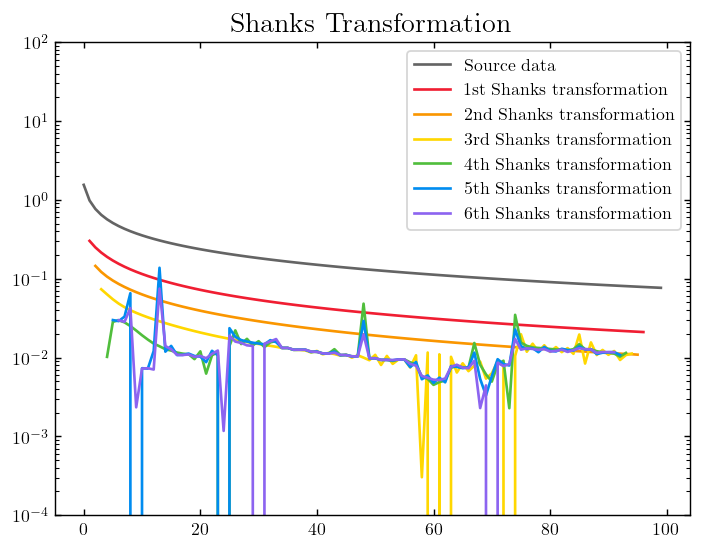

In [3]:
# Shanks Transformation

import numpy as np
import matplotlib.pyplot as plt

def shanks_transformation_vectorized(data):
    shifted_left = np.pad(data[:-1], (1, 0), mode='constant')
    shifted_right = np.pad(data[1:], (0, 1), mode='constant')

    numerator = data ** 2 - shifted_right * shifted_left
    denominator = 2 * data - shifted_right - shifted_left

    transformed_data = np.where((np.arange(len(data)) > 0) & (np.arange(len(data)) < len(data) - 1), numerator / denominator, 0)
    
    return transformed_data[1:-1]

def apply_shanks_transformations(data, num_iterations):
    return [data := shanks_transformation_vectorized(data) for _ in range(num_iterations+1)]

# Generate a new dataset using the function f(x) = sum_n 1/(n^2+x) for n in [1, 10] which converges to 0 as x approaches infinity
X_demo = np.arange(0, 100)
Y_demo = np.array([np.sum([1 / (n ** 2 + x) for n in range(1, 11)]) for x in X_demo])

# Apply Shanks transformations
num_iterations = 6
transformed_data_list_demo = apply_shanks_transformations(Y_demo, num_iterations)

# Set up the specified style parameters
plt.figure(dpi=128)
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

# Plot the data and Shanks transformations
plt.title("Shanks Transformation")
plt.plot(X_demo, Y_demo, c="#646464", label="Source data")

colors = ["#F01E32", "#FA9600", "#FFD700", "#50BE3C", "#008CF0", "#8C64F0"]
labels = ["1st Shanks transformation", "2nd Shanks transformation", "3rd Shanks transformation", "4th Shanks transformation", "5th Shanks transformation", "6th Shanks transformation"]

for i in range(1, num_iterations + 1):
    transformed_data = transformed_data_list_demo[i]
    plt.plot(X_demo[i:len(transformed_data)+i], transformed_data, c=colors[i-1], label=labels[i-1])

plt.yscale('log'); plt.ylim([1e-4, 1e2])
plt.legend(loc="best")
plt.show()

### Wynn's Epsilon Algorithm 

This series acceleration method improves the rate of convergence of a series by using a sequence of partial sums and their differences to construct a new sequence that converges faster than the original sequence. Similar to the Shanks transformation, it is excellent for accelerating slowly converging series but may be unstable in some situations, leading to a decrease in convergence rate.